In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import zipfile

with zipfile.ZipFile('/data.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [6]:
import os
os.listdir('/content/')


['.config', 'data.csv', 'sample_data']

In [8]:
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')  # also called latin1


In [9]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
print(df.columns.tolist())
df.info()
print(df.isnull().sum())


['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [11]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
# Remove rows where CustomerID or Description is missing
df.dropna(subset=['CustomerID', 'Description'], inplace=True)


In [14]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [15]:
# Create TotalAmount column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [16]:
df[['Quantity', 'UnitPrice', 'TotalAmount']].head()


,Quantity,UnitPrice,TotalAmount
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [17]:
# Remove negative or zero values from Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [18]:
df[['Quantity', 'UnitPrice']].describe()


,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [25]:

plt.savefig('monthly_trend.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-26-3428736586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='TotalAmount', y='CustomerID', palette='rocket')


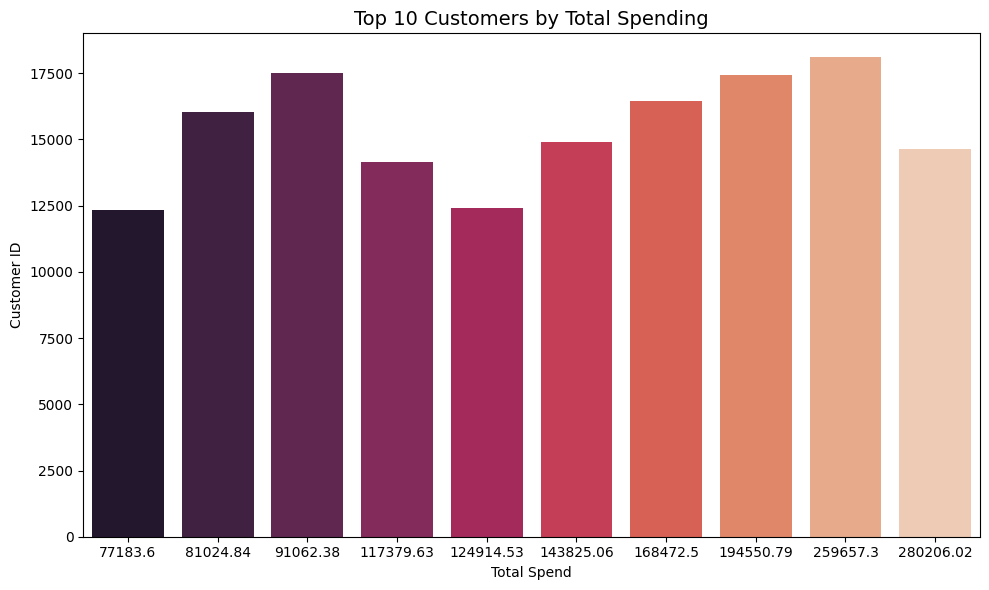

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_customers, x='TotalAmount', y='CustomerID', palette='rocket')
plt.title('Top 10 Customers by Total Spending', fontsize=14)
plt.xlabel('Total Spend')
plt.ylabel('Customer ID')

# ✅ Save image before showing
plt.savefig('top_customers.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


/tmp/ipython-input-27-1809282559.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales, x='TotalAmount', y='Country', palette='crest')


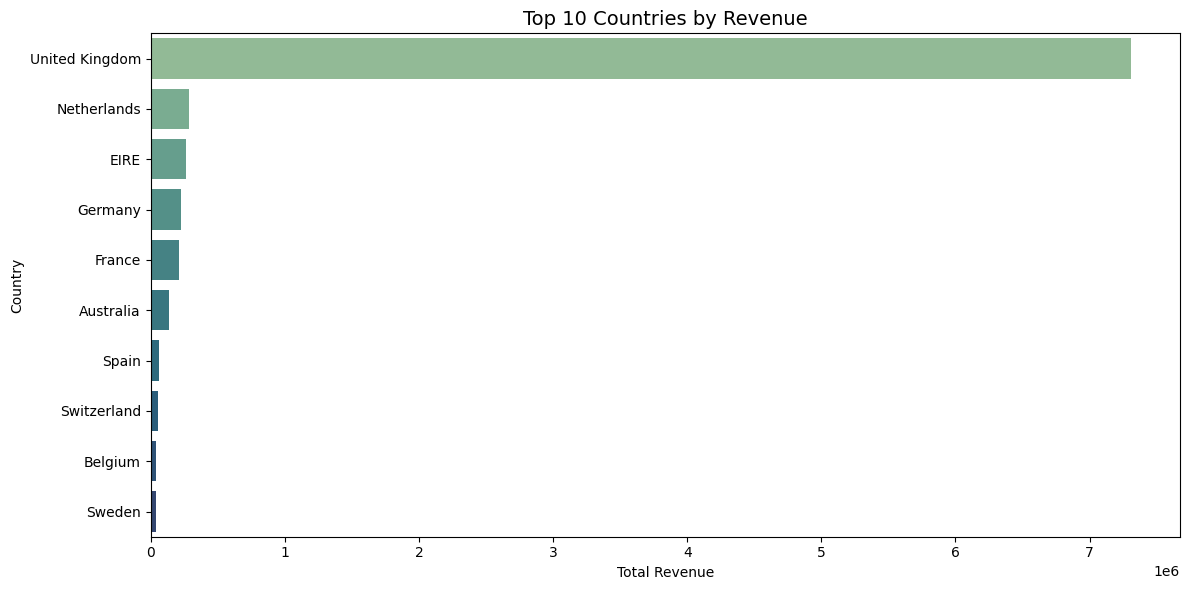

In [27]:
# Top 10 Countries by Total Revenue
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
country_sales = country_sales.reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=country_sales, x='TotalAmount', y='Country', palette='crest')
plt.title('Top 10 Countries by Revenue', fontsize=14)
plt.xlabel('Total Revenue')
plt.ylabel('Country')

# ✅ Save the figure as PNG
plt.savefig('top_countries.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


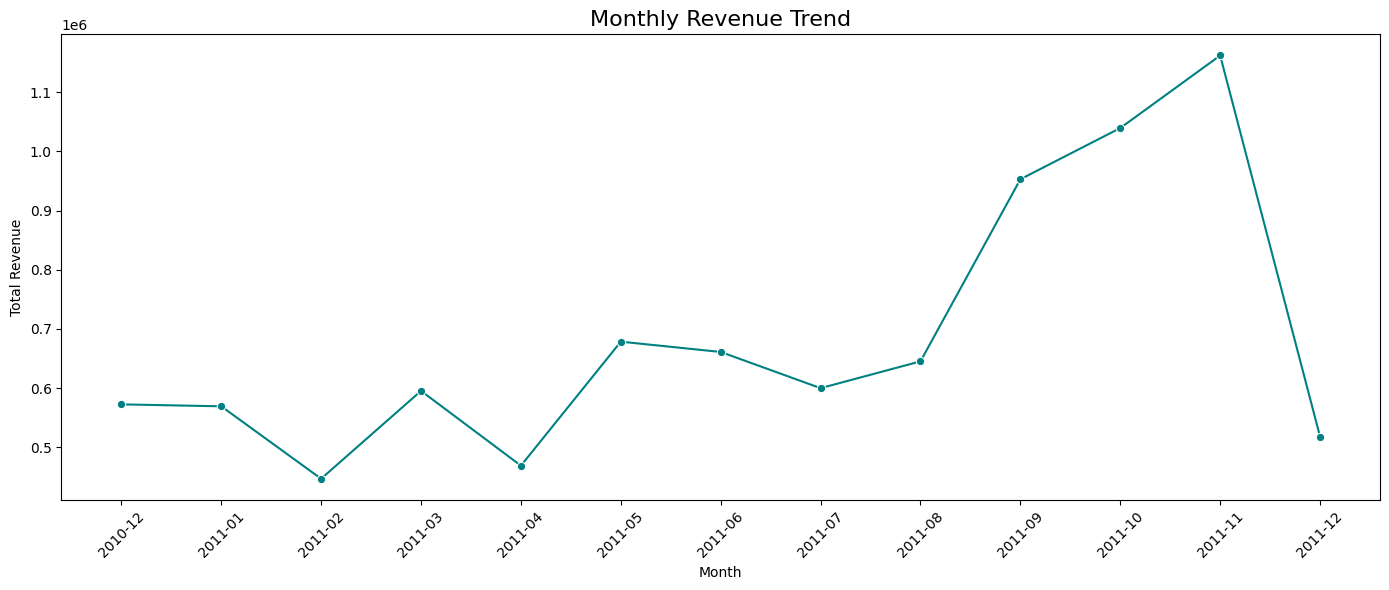

In [28]:
# Extract month and year from InvoiceDate
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and sum TotalAmount
monthly_sales = df.groupby('YearMonth')['TotalAmount'].sum().reset_index()

# Convert YearMonth to string for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='TotalAmount', marker='o', color='teal')
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# ✅ Save the image
plt.savefig('monthly_trend.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


/tmp/ipython-input-29-1976494491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='TotalAmount', y='CustomerID', palette='rocket')


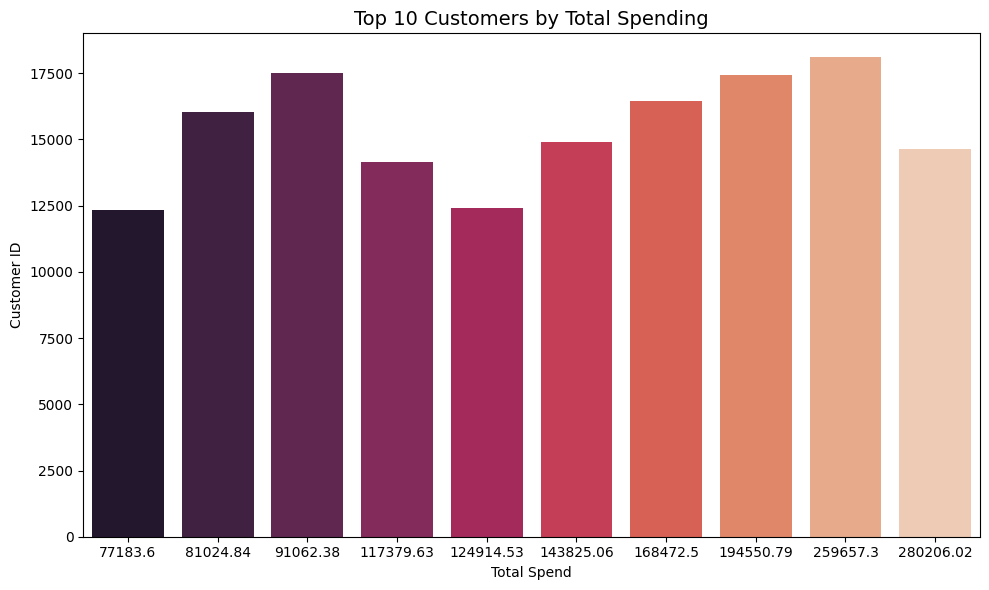

In [29]:
 # Group by CustomerID and sum their total spend
top_customers = df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_customers, x='TotalAmount', y='CustomerID', palette='rocket')
plt.title('Top 10 Customers by Total Spending', fontsize=14)
plt.xlabel('Total Spend')
plt.ylabel('Customer ID')

# ✅ Save as image
plt.savefig('top_customers.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [23]:
# Create a new dataframe of total spend per invoice
invoice_value = df.groupby('InvoiceNo')['TotalAmount'].sum().reset_index()

# Calculate AOV
average_order_value = invoice_value['TotalAmount'].mean()
print(f"Average Order Value (AOV): ₹{average_order_value:.2f}")


Average Order Value (AOV): ₹480.87


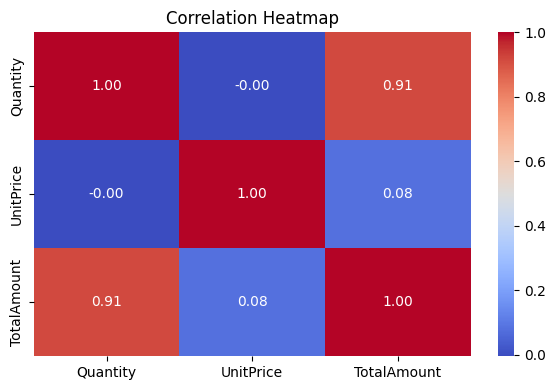

In [30]:
# Select only numeric columns
numeric_df = df[['Quantity', 'UnitPrice', 'TotalAmount']]

# Correlation matrix
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# ✅ Save the heatmap image
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

